# neural-network-scratch

[reference](https://beckernick.github.io/neural-network-scratch/)

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  


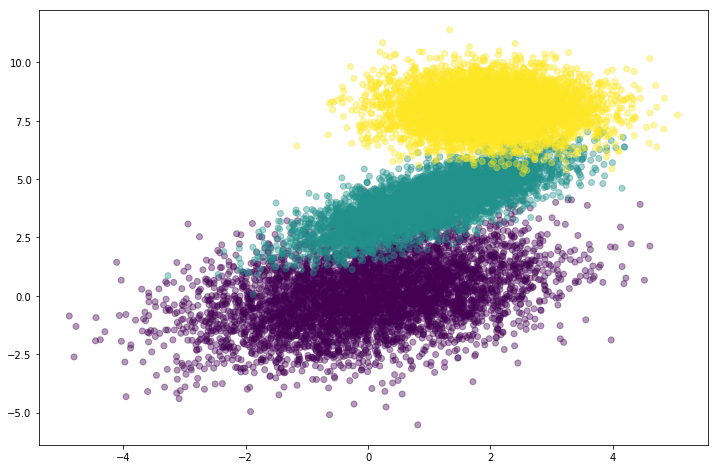

In [2]:
np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[2, .75],[.75, 2]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)
x3 = np.random.multivariate_normal([2, 8], [[0, .75],[.75, 0]], num_observations)

simulated_separableish_features = np.vstack((x1, x2, x3)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations),np.ones(num_observations), np.ones(num_observations) + 1))

plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = simulated_labels, alpha = .4)

## Data Preparation

In [3]:
labels_onehot = np.zeros((simulated_labels.shape[0], 3)).astype(int)
labels_onehot[np.arange(len(simulated_labels)), simulated_labels.astype(int)] = 1

train_dataset, test_dataset, \
train_labels, test_labels = train_test_split(
    simulated_separableish_features, labels_onehot, test_size = .1, random_state = 12)

## Building a Neural Network in Tensorflow

In [4]:
hidden_nodes = 5
num_labels = train_labels.shape[1]
batch_size = 100
num_features = train_dataset.shape[1]
learning_rate = .01

graph = tf.Graph()
with graph.as_default():
    
    # Data
    tf_train_dataset = tf.placeholder(tf.float32, shape = [None, num_features])
    tf_train_labels = tf.placeholder(tf.float32, shape = [None, num_labels])
    tf_test_dataset = tf.constant(test_dataset)
  
    # Weights and Biases
    layer1_weights = tf.Variable(tf.truncated_normal([num_features, hidden_nodes]))
    layer1_biases = tf.Variable(tf.zeros([hidden_nodes]))
    
    layer2_weights = tf.Variable(tf.truncated_normal([hidden_nodes, num_labels]))
    layer2_biases = tf.Variable(tf.zeros([num_labels]))
    
    # Three-Layer Network
    def three_layer_network(data):
        input_layer = tf.matmul(data, layer1_weights)
        hidden = tf.nn.relu(input_layer + layer1_biases)
        output_layer = tf.matmul(hidden, layer2_weights) + layer2_biases
        return output_layer
    
    # Model Scores
    model_scores = three_layer_network(tf_train_dataset)
    
    # Loss
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(model_scores, tf_train_labels))
  
    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    
    # Predictions
    train_prediction = tf.nn.softmax(model_scores)
    test_prediction = tf.nn.softmax(three_layer_network(tf_test_dataset))

In [5]:
def accuracy(predictions, labels):
    preds_correct_boolean =  np.argmax(predictions, 1) == np.argmax(labels, 1)
    correct_predictions = np.sum(preds_correct_boolean)
    accuracy = 100.0 * correct_predictions / predictions.shape[0]
    return accuracy

In [6]:
num_steps = 10001

with tf.Session(graph=graph) as session:
    tf.initialize_all_variables().run()
    for step in range(num_steps):
        offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
        minibatch_data = train_dataset[offset:(offset + batch_size), :]
        minibatch_labels = train_labels[offset:(offset + batch_size)]
        
        feed_dict = {tf_train_dataset : minibatch_data, tf_train_labels : minibatch_labels}
        
        _, l, predictions = session.run(
            [optimizer, loss, train_prediction], feed_dict = feed_dict
            )
        
        if step % 1000 == 0:
            print ('Minibatch loss at step {0}: {1}'.format(step, l))

    print ('Test accuracy: {0}%'.format(accuracy(test_prediction.eval(), test_labels)))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Minibatch loss at step 0: 7.160241603851318
Minibatch loss at step 1000: 0.3354301452636719
Minibatch loss at step 2000: 0.19977642595767975
Minibatch loss at step 3000: 0.15409409999847412
Minibatch loss at step 4000: 0.13152645528316498
Minibatch loss at step 5000: 0.12522532045841217
Minibatch loss at step 6000: 0.11975768953561783
Minibatch loss at step 7000: 0.07438249886035919
Minibatch loss at step 8000: 0.062310781329870224
Minibatch loss at step 9000: 0.08754557371139526
Minibatch loss at step 10000: 0.0961623564362526
Test accuracy: 96.46666666666667%


## Building a Neural Network from Scratch

In [7]:
hidden_nodes = 5
num_features = data.shape[1]
num_labels = labels.shape[1]

NameError: name 'data' is not defined

In [8]:
layer1_weights_array = np.random.normal(0, 1, [num_features, hidden_nodes]) 
layer1_biases_array = np.zeros((1, hidden_nodes))

layer2_weights_array = np.random.normal(0, 1, [hidden_nodes, num_labels]) 
layer2_biases_array = np.zeros((1, num_labels))

In [9]:
def relu_activation(data_array):
    return np.maximum(data_array, 0)

In [10]:
def softmax(output_array):
    logits_exp = np.exp(output_array)
    return logits_exp / np.sum(logits_exp, axis = 1, keepdims = True)

In [11]:
def cross_entropy_softmax_loss_array(softmax_probs_array, y_onehot):
    indices = np.argmax(y_onehot, axis = 1).astype(int)
    predicted_probability = softmax_probs_array[np.arange(len(softmax_probs_array)), indices]
    log_preds = np.log(predicted_probability)
    loss = -1.0 * np.sum(log_preds) / len(log_preds)
    return loss

In [13]:
def regularization_L2_softmax_loss(reg_lambda, weight1, weight2):
    weight1_loss = 0.5 * reg_lambda * np.sum(weight1 * weight1)
    weight2_loss = 0.5 * reg_lambda * np.sum(weight2 * weight2)
    return weight1_loss + weight2_loss

In [16]:
training_data = train_dataset
training_labels = train_labels

hidden_nodes = 5
num_labels = training_labels.shape[1]
num_features = training_data.shape[1]
learning_rate = .01
reg_lambda = .01

# Weights and Bias Arrays, just like in Tensorflow
layer1_weights_array = np.random.normal(0, 1, [num_features, hidden_nodes]) 
layer2_weights_array = np.random.normal(0, 1, [hidden_nodes, num_labels]) 

layer1_biases_array = np.zeros((1, hidden_nodes))
layer2_biases_array = np.zeros((1, num_labels))


for step in range(5001):

    input_layer = np.dot(training_data, layer1_weights_array)
    hidden_layer = relu_activation(input_layer + layer1_biases_array)
    output_layer = np.dot(hidden_layer, layer2_weights_array) + layer2_biases_array
    output_probs = softmax(output_layer)
    
    loss = cross_entropy_softmax_loss_array(output_probs, training_labels)
    loss += regularization_L2_softmax_loss(reg_lambda, layer1_weights_array, layer2_weights_array)

    output_error_signal = (output_probs - training_labels) / output_probs.shape[0]
    
    error_signal_hidden = np.dot(output_error_signal, layer2_weights_array.T) 
    error_signal_hidden[hidden_layer <= 0] = 0
    
    gradient_layer2_weights = np.dot(hidden_layer.T, output_error_signal)
    gradient_layer2_bias = np.sum(output_error_signal, axis = 0, keepdims = True)
    
    gradient_layer1_weights = np.dot(training_data.T, error_signal_hidden)
    gradient_layer1_bias = np.sum(error_signal_hidden, axis = 0, keepdims = True)

    gradient_layer2_weights += reg_lambda * layer2_weights_array
    gradient_layer1_weights += reg_lambda * layer1_weights_array

    layer1_weights_array -= learning_rate * gradient_layer1_weights
    layer1_biases_array -= learning_rate * gradient_layer1_bias
    layer2_weights_array -= learning_rate * gradient_layer2_weights
    layer2_biases_array -= learning_rate * gradient_layer2_bias
    
    if step % 500 == 0:
            print ('Loss at step {0}: {1}'.format(step, loss))

Loss at step 0: 2.9703156928200616
Loss at step 500: 0.673303741742798
Loss at step 1000: 0.5038560362521088
Loss at step 1500: 0.41334536685608564
Loss at step 2000: 0.3526794838981581
Loss at step 2500: 0.3111722378729781
Loss at step 3000: 0.2825504616754235
Loss at step 3500: 0.2622623430016995
Loss at step 4000: 0.2474470565324911
Loss at step 4500: 0.23626175394529542
Loss at step 5000: 0.227432723213069


## Predicting with the Learned Model

In [17]:
input_layer = np.dot(test_dataset, layer1_weights_array)
hidden_layer = relu_activation(input_layer + layer1_biases_array)
scores = np.dot(hidden_layer, layer2_weights_array) + layer2_biases_array
probs = softmax(scores)
print ('Test accuracy: {0}%'.format(accuracy(probs, test_labels)))

Test accuracy: 96.4%


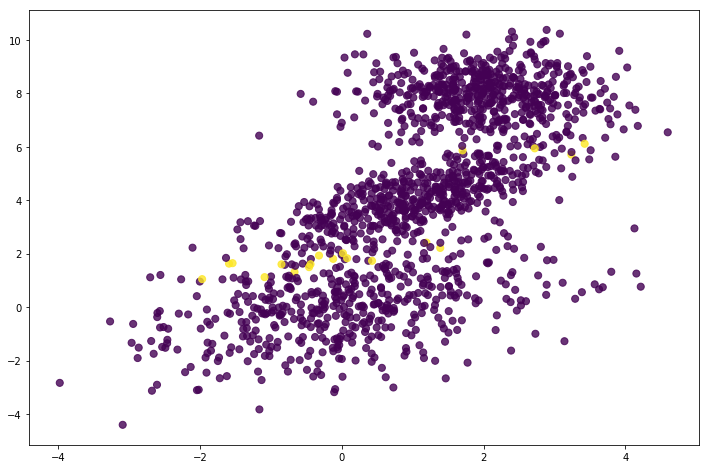

In [18]:
labels_flat = np.argmax(test_labels, axis = 1)
predictions = np.argmax(probs, axis = 1)
plt.figure(figsize = (12, 8))
plt.scatter(test_dataset[:, 0], test_dataset[:, 1], c = predictions == labels_flat - 1, alpha = .8, s = 50)
